Linear Regression is a machine learning algorithm which uses a dependent variable to predict future outcomes based on one or more independent variables. It measures the association between two variables. Linear regression analysis is the most widely used of all machine learning algorithms.

Students Grade Prediction:
Student Grades Prediction is based on the problem of regression in machine learning.
DataSet : https://archive.ics.uci.edu/ml/datasets/Student+Performance

In [10]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.utils import shuffle

data=pd.read_csv("https://raw.githubusercontent.com/Shenyjoy/Datasets/main/Grades.csv")
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [14]:
#The shuffle is used to shuffle your matrices randomly. 
#Programmatically, random sequences are generated using a seed number. 
#You are guaranteed to have the same random sequence if you use the same seed.
#The random_state parameter allows you to provide this random seed to sklearn methods. 
#This is useful because it allows you to reproduce the randomness for your development and testing purposes. 
#So, in the shuffle method, if I use the same random_state with the same dataset, then I am always guaranteed to have the same shuffle. Consider the following example

X = np.array([[1., 0.], [2., 1.], [0., 0.]])
X = shuffle(X, random_state=20)
X

#If the random_state = 20, we will always get exactly the same shuffling. 
#This is particularly useful for unit tests, where you would like to have reproducible results for asserting your conditions being tested.

array([[1., 0.],
       [2., 1.],
       [0., 0.]])

In [16]:
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [17]:
data.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [18]:
#Add the necessary columns to train the ML model for the task - Student Grades Prediction
data=data[["G1","G2","G3","studytime","failures","absences"]]
#Declare G# column as the target label
predict="G3"

x=np.array(data.drop([predict],1))
y=np.array(data[predict])

#Split the dataset into 20% testing and 80% training
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)


In [27]:
#Train the Linear Regression Model for the task of Student Grades Prediction
# There are three steps to model something with sklearn

# 1. Set up the model
model=LinearRegression()

# 2. Use fit
model.fit(xtrain,ytrain)
accuracy=model.score(xtest,ytest)
print(accuracy)

0.7355595853884604


In [28]:
# Predictions made by the model
y_pred =model.predict(xtest)

for i in range(len(y_pred)):
    print(y_pred[x],xtest[x],[ytest[x]])


[[12.91020427  8.72352876  8.03116889 18.23014827  8.72352876]
 [12.91020427 12.91020427  8.03116889 18.23014827 15.2471447 ]
 [10.58112265 15.65120129  8.03116889  8.4946866   8.52367982]
 ...
 [ 8.52367982 15.65120129  9.44488186  8.4946866   8.4946866 ]
 [ 6.05634702 10.71004034  9.44488186 18.23014827 18.23014827]
 [15.65120129  9.75984509  9.44488186 18.23014827 12.91020427]] [[[13 13  4  0  4]
  [10  9  2  0  4]
  [10  8  1  0 10]
  [16 18  2  0  0]
  [10  9  2  0  4]]

 [[13 13  4  0  4]
  [13 13  4  0  4]
  [10  8  1  0 10]
  [16 18  2  0  0]
  [15 15  2  0  2]]

 [[10 11  2  0  2]
  [17 15  1  0  2]
  [10  8  1  0 10]
  [ 9  9  2  0  2]
  [ 8  9  2  0  8]]

 ...

 [[ 8  9  2  0  8]
  [17 15  1  0  2]
  [ 9 10  3  0  4]
  [ 9  9  2  0  2]
  [ 9  9  2  0  2]]

 [[ 7  6  2  0 26]
  [10 11  2  0  6]
  [ 9 10  3  0  4]
  [16 18  2  0  0]
  [16 18  2  0  0]]

 [[17 15  1  0  2]
  [10 10  1  0  4]
  [ 9 10  3  0  4]
  [16 18  2  0  0]
  [13 13  4  0  4]]] [array([[12,  9,  9, 19,  9]

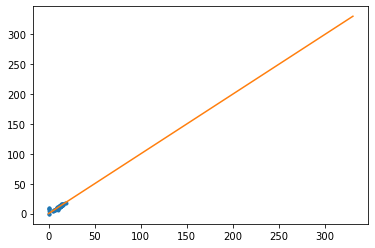

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(ytest,y_pred,'.')
# plot a line, a perfit predict would all fall on this line
x = np.linspace(0, 330, 100)
y = x
plt.plot(x, y)
plt.show()